# TD Learning with Working Memory
The following program demonstrates _Temporal Difference Learning_. We begin with a 1D maze which contains a single, but changing, goal. Each section of the maze can be thought of as a __state__. We set the reward for the goal to one, and the reward for all other states to zero. We then drop the __agent__ into a random state. While in this first state, a signal is given. The goal will be located in a different end of the maze based on that signal. The agent searches for the goal. Each time the goal is found the __value__ of the states used to get there will update to show the most efficient path.

Epoch is set to the amount of times the agent will be dropped into a state to find the goal. The goal will change based on which signal is given at the beginning of each episode.


Try out adjusting the length of the 1D Maze:

In [120]:
from fractions import Fraction
import numpy as np

LENGTH = 11  # Try me out
GAMMA = .5
EPOCH = 100

class Maze:
    GOAL = 0

    def __init__(self):
        self._reward = np.zeros((3, LENGTH))  # Reward Vector
        self._value = np.zeros((3, 3, LENGTH)) #np.ones(LENGTH, dtype='int')         # Value Vector

    # Disply the maze with current values inside
    def display(self):
        # print values of first signal
        print("Signal 0:")
        print(" ------" * LENGTH)
        
        print("|", end='')
        for i in range(LENGTH):
            print(" %4s |" %Fraction(self._value[0, 1, i]), end='')
        print()
        print(" ------" * LENGTH)
        for i in range(LENGTH):
            print("  ", i, "  ", end='')
        print()
        
        # print values of second signal
        print("Signal 1:")
        print(" ------" * LENGTH)
        
        print("|", end='')
        for i in range(LENGTH):
            print(" %4s |" %Fraction(self._value[0, 2, i]), end='')
        print()
        print(" ------" * LENGTH)
        for i in range(LENGTH):
            print("  ", i, "  ", end='')
        print()
        print("---------------------------------------------------------------")
        return

    # Drop agent into maze and search for goal
    def episode(self, s):
        # Randomly decide signal - 0 means goal is in state 0
                              #  - 1 means goal is in last state
        sig = np.random.randint(1,3)
        if (sig == 1):
            self.GOAL = 0
        else:
            self.GOAL = LENGTH-1
        mem = sig
        self._reward[mem, self.GOAL] = 1
        sig = 0
        
        # Search and update value until reaches goal
        while(s != self.GOAL):
            self._value[sig, mem, s] += self.delta(s, sig, mem)
            # Move to next state
            s = self._nextS(s, sig, mem)
        self._value[sig, mem, s] += self.delta(s, sig, mem)
        

        return

    # delta(s) = (r(s) + gamma v(s + 1)) - v(s)
    def delta(self, s, sig, mem):
        if (s == self.GOAL):
            future_val = 0.0
        else:
            future_val = GAMMA * self.v(self._nextS(s, sig, mem), sig, mem)
        term = self._reward[mem, s] + future_val
        return term - self._value[sig, mem, s]
    
    # V(s) = v(s) + gamma V(s+1)
    def v(self, s, sig, mem):
        if (s == self.GOAL):
            return self._value[sig, mem, self.GOAL]
        else:
            return self._reward[mem, s] + (GAMMA * self._value[sig, mem, self._nextS(s, sig, mem)])

    # Obtain the next state to  be moved to
    def _nextS(self, s, sig, mem):
        # determine left and right values (accounting for wrap around)
        if (s == 0):
            left = (LENGTH-1)
            right = s + 1
        elif (s == (LENGTH-1)):
            left = s - 1
            right = 0
        else:
            left = s - 1
            right = s + 1

        # determine whether to go left or right
        if (self._value[sig, mem, left] >= self._value[sig, mem, right]):
            nextS = left
        else:
            nextS = right

        return nextS
    
    # Obtain the matrix of state values for a given signal
    def get_values(self, mem):
        return self._value[0, mem, :]

Signal 0:
 ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------
|    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |
 ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------
   0      1      2      3      4      5      6      7      8      9      10   
Signal 1:
 ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------
|    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |
 ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------
   0      1      2      3      4      5      6      7      8      9      10   
---------------------------------------------------------------
Maze after 100 epochs:
Signal 0:
 ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------
|    1 |  1/2 |  1/4 |  1/8 | 1/16 | 1/32 | 1/64 | 1/16 |  1/8 |  1/4 |  1/2 |
 ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------
   0      1      2  

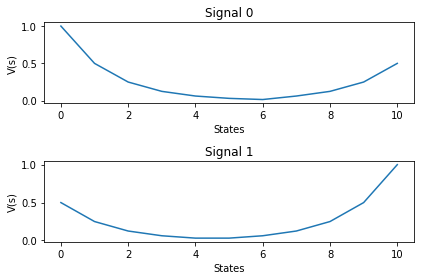

In [122]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

maze = Maze()
maze.display()

for i in range(EPOCH):
    s = np.random.randint(0, LENGTH)
    maze.episode(s)
    
print("Maze after", EPOCH, "epochs:")
maze.display()

# Plot the results
plt.subplot(211)
v = maze.get_values(1)
states = np.linspace(0, LENGTH-1, LENGTH)
plt.plot(states, v)
plt.title("Signal 0")
plt.xlabel("States")
plt.ylabel("V(s)")

plt.subplot(212)
v = maze.get_values(2)
states = np.linspace(0, LENGTH-1, LENGTH)
plt.plot(states, v)
plt.title("Signal 1")
plt.xlabel("States")
plt.ylabel("V(s)")
plt.tight_layout()
plt.show()